In [165]:
import pandas as pd
import pandas_datareader
import pandas.plotting
from pandas.plotting import scatter_matrix
from pandas.plotting import table
import pandas_datareader.data as web
# from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
#import pandas.DateOffset
import datetime as dt
import time
import csv

In [143]:
pandas_datareader.__version__

'0.7.0'

In [144]:
pd.__version__

'0.24.0'

In [145]:
def get_stocks (ticker, startdate,enddate,data_source):
    #data sources--------------------------------------------------------------
    if (data_source=='local'):
        location=r'C:\Users\Crystal\Desktop\datasets\sandp500\individual_stocks_5yr\{}_data.csv'.format(ticker.upper())
        the_data=pd.read_csv(location,parse_dates=True,index_col='Date')
        the_data.to_csv(r'C:\Users\Crystal\Desktop\datasets\stocks\{}_dataset.csv'.format(ticker.upper()))
    elif (data_source=='remote'):
        #the_data=pdr.get_data_yahoo(ticker.upper(),retry_count=3,start=startdate,end=enddate)
#         the_data=web.DataReader(ticker.upper(),'yahoo',retry_count=3,start=startdate,end=enddate)
#         the_data=web.DataReader(ticker.upper(),'google',retry_count=3,start=startdate,end=enddate)
#         the_data=web.DataReader(ticker.upper(),'morningstar',retry_count=3,start=startdate,end=enddate)
        the_data=web.DataReader(ticker.upper(),'iex',retry_count=3,start=startdate,end=enddate)

        the_data.to_csv(r'C:\Users\Crystal\Desktop\datasets\stocks\{}_dataset.csv'.format(ticker.upper()))
    
    #print (ticker.upper())
    #print(the_data)
    #return (the_data)
        
        
        

In [146]:
def calculate_indicators (ticker, ticker_data):
    #print('I have the {} data.'.format(ticker))
    #print(ticker_data.head())
    
    ticker_data['10ma']=ticker_data['Close'].rolling(window=10).mean()
    ticker_data.dropna(inplace=True)
    ticker_data['20ma']=ticker_data['Close'].rolling(window=20).mean()
    ticker_data['+2sigma']=ticker_data['20ma']+((ticker_data['Close'].rolling(window=20).std())*2)
    ticker_data['-2sigma']=ticker_data['20ma']-((ticker_data['Close'].rolling(window=20).std())*2)
    ticker_data['Vol_mavg']=ticker_data['Volume'].rolling(window=20).mean()
    ticker_data['Daily_Return']=((ticker_data.Close-ticker_data.Close.shift(1))/ticker_data.Close.shift(1))*100
    ticker_data['Daily_Return_ma']=ticker_data['Daily_Return'].rolling(window=10).mean()
    ticker_data.dropna(inplace=True)
    
    ticker_data.sort_index(ascending=False,inplace=True)
    
    #print(ticker_data.head())
    #print(ticker_data.info())
    return ticker_data

In [147]:
    def plot_the_stock(ticker,ticker_data,startdate,enddate):
        #print('Ready to plot')
        
        ticker_data.sort_index(ascending=True,inplace=True)
        
        fig=plt.figure(figsize=(15,15))
        fig.suptitle('{} Plot'.format(ticker))
 
        ax=fig.add_subplot(311)
        #ax1=fig.add_subplot(412)
        ax2=fig.add_subplot(312)
        ax3=fig.add_subplot(313)

        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
 
        ax.set_title(label='{} Stock Data'.format(ticker),loc='left')
    
        ax.plot(ticker_data[startdate:enddate][['Close','10ma','20ma']])
        ax.plot(ticker_data[startdate:enddate][['+2sigma','-2sigma']],color='black')
        #ax.plot(ticker_data[startdate:enddate][['High','Low']],color='g')
        
        ax.legend(ticker_data[['Close','10ma','20ma','+2sigma','-2sigma']])
        
        ax2.plot(ticker_data[startdate:enddate]['Vol_mavg'])
        ax2.bar(ticker_data[startdate:enddate].index,ticker_data[startdate:enddate]['Volume'],color='black')
        
        ax3.set_ylabel('% Daily Return ')
        ax3.bar(ticker_data[startdate:enddate].index,ticker_data[startdate:enddate]['Daily_Return'],color='black')
        ax3.plot(ticker_data[startdate:enddate]['Daily_Return_ma'],color='r')
        ax3.legend()

        
        plt.savefig(r'C:\Users\Crystal\Desktop\datasets\stocks\{} Stock Data.pdf'.format(ticker))
        
        


In [148]:
def price_over_10(ticker,ticker_data,start_date,end_date):
    
    ma_check=ticker_data['Close'].iloc[0]-ticker_data['10ma'].iloc[0]
    DRMA=ticker_data['Daily_Return_ma'].iloc[0]
        
    #print(ticker_data['Close'].iloc[0]-ticker_data['10ma'].iloc[0])
      
    ma_check_previous= ticker_data['Close'].iloc[1]-ticker_data['10ma'].iloc[1]
        
    if (ma_check>0) and (ma_check_previous<0) and (DRMA>0):
        print('{} meets the price _over_10 requirement. \n'.format(ticker))
        in_the_trade(ticker,ticker_data)
        plot_the_stock(ticker,ticker_data,start_date,end_date)
    elif(ma_check>0) and (ma_check_previous>0):
        #print('{} is already over the 10sma \n'.format(ticker))
        pass
    elif (ma_check<0):
        #print('price _over_10 requirement is not met for {} \n'.format(ticker))
        pass

In [149]:
def in_the_trade(ticker,ticker_data,target_pct=.025,stop_loss_pct=.025):
    
    Location=(r'C:\Users\Crystal\Desktop\datasets\sandp500\P_over_10')
    ticker_data['Target']=ticker_data.Close.iloc[0]+(ticker_data.Close.iloc[0]*target_pct)
    ticker_data['Stop_Loss']=ticker_data.Close.iloc[0]-(ticker_data.Close.iloc[0]*stop_loss_pct)
    ticker_data['Symbol']=ticker
    
    trade_entry=ticker_data.head(1)
    trade_entry.to_csv(Location+'\{}_trade_watch.csv'.format(ticker))
    
    with open(Location+'\P10_trade_watch\P10_tickers.csv','a',newline='') as me_file:
        daywriter=csv.writer(me_file)
        daywriter.writerow([ticker])
    me_file.close
    
    
    #print(trade_entry)

In [150]:
def trade_watch():
    pass

In [151]:
def list_of_stocks():
    my_stocks=[]
    Location_1=(r'C:\Users\Crystal\Desktop\datasets\sandp500\SP500_tickers\All_SP500.csv')
    with open(Location_1,'r') as get_tickers:
        dayreader=csv.reader(get_tickers)
        #print (dayreader)
        for the_symbols in dayreader:
            my_stocks.append(the_symbols[0])     
    get_tickers.close
    
    return my_stocks

In [152]:
def consolidate_data():
    #with open(Location+'\P10_trade_watch\P10_watch.csv','a',newline='') as me_file:
        #daywriter=csv.writer(me_file)
        #daywriter.writerow([trade_entry])
    #me_file.close
    pass

In [153]:
if __name__ == "__main__":
    startTime=time.time()
    # stocks=list_of_stocks()
    #print(stocks)
    stocks=['cron','apha']
    stocks.sort()
    start_date=dt.datetime(2018,1,1)
    end_date=dt.date.today()
    source_of_data='remote'

In [154]:
    for i in stocks:
        get_stocks(i,start_date,end_date,source_of_data)
        location=r'C:\Users\Crystal\Desktop\datasets\stocks\{}_dataset.csv'.format(i.upper())
        the_stock_data=pd.read_csv(location,parse_dates=True,index_col='date')
        the_stock_data.columns=the_stock_data.columns.str.title()
#         the_stock_data=pd.read_csv(location)
        print('\n',i)
        print(the_stock_data.tail())

    for k in stocks:
        Location=r'C:\Users\Crystal\Desktop\datasets\stocks\{}_dataset.csv'.format(k.upper())
        stock_reviewed=pd.read_csv(Location,parse_dates=True,index_col='date')
        stock_reviewed.columns=stock_reviewed.columns.str.title()
        stock_with_indicators=calculate_indicators(k.upper(),stock_reviewed)
#         price_over_10(k.upper(),stock_with_indicators,start_date,end_date)
        print('\n',k)
        print(stock_with_indicators.tail())
        
#         plot_the_stock(k.upper(),stock_with_indicators,start_date,end_date)

    endTime=time.time()

    print('Duration :',endTime-startTime,' seconds')


 apha
             Open   High    Low  Close    Volume
date                                            
2019-01-30   7.40   7.75   7.27   7.66   5258811
2019-01-31   7.76   8.93   7.67   8.74  13814621
2019-02-01   9.05  10.00   8.90   9.62  28688793
2019-02-04  10.10  10.95  10.00  10.84  29816137
2019-02-05  10.86  10.89   9.25  10.71  23139329

 cron
             Open   High      Low  Close    Volume
date                                              
2019-01-30  18.14  19.20  17.6703  18.43  22137670
2019-01-31  18.65  20.35  18.3800  19.68  29701695
2019-02-01  20.25  21.79  20.1000  20.81  48676298
2019-02-04  21.82  25.10  21.3000  23.25  67620336
2019-02-05  22.35  23.96  20.5600  21.83  55485179

 apha
               Open     High      Low    Close  Volume      10ma       20ma  \
date                                                                          
2018-02-16  11.3719  11.6984  10.9604  11.1200  806371  12.31608  13.742750   
2018-02-15  12.5600  12.6600  11.8300  11.

In [155]:
the_stock_data.head()

,Open,High,Low,Close,Volume
date,,,,,
2018-01-02,7.7411,8.2460,7.0900,8.0564,1401112
2018-01-03,8.5000,8.9100,7.5896,8.5974,1503683
2018-01-04,8.7000,8.7000,7.2727,7.7489,1910612
2018-01-05,7.3414,8.5065,7.0600,8.4800,1189225
2018-01-08,9.0400,11.0783,8.8420,10.9500,2104036


In [156]:
the_stock_data.tail()

,Open,High,Low,Close,Volume
date,,,,,
2019-01-30,18.14,19.20,17.6703,18.43,22137670
2019-01-31,18.65,20.35,18.3800,19.68,29701695
2019-02-01,20.25,21.79,20.1000,20.81,48676298
2019-02-04,21.82,25.10,21.3000,23.25,67620336
2019-02-05,22.35,23.96,20.5600,21.83,55485179


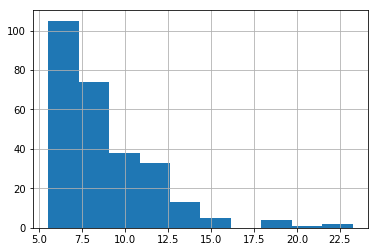

In [157]:
the_stock_data.Close.hist()

plt.show()

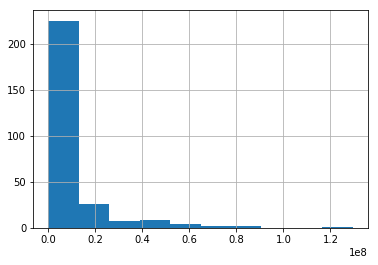

In [158]:
the_stock_data.Volume.hist()

plt.show()

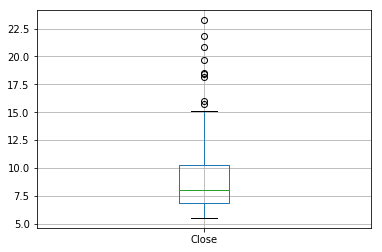

In [159]:
the_stock_data.boxplot('Close')
plt.show()

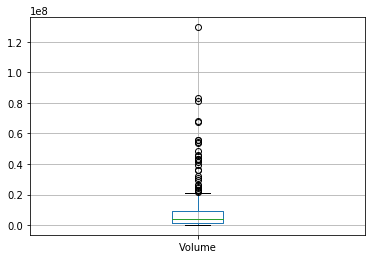

In [160]:
the_stock_data.boxplot('Volume')
plt.show()

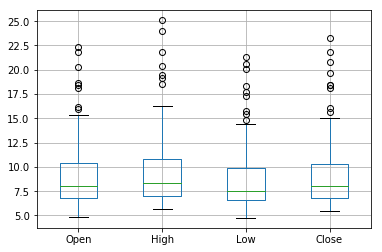

In [161]:
the_stock_data[['Open','High','Low','Close']].boxplot()
plt.show()

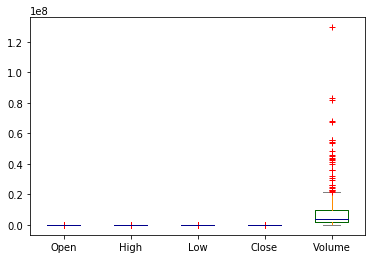

In [162]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
the_stock_data.plot.box(color=color, sym='r+')
plt.show()


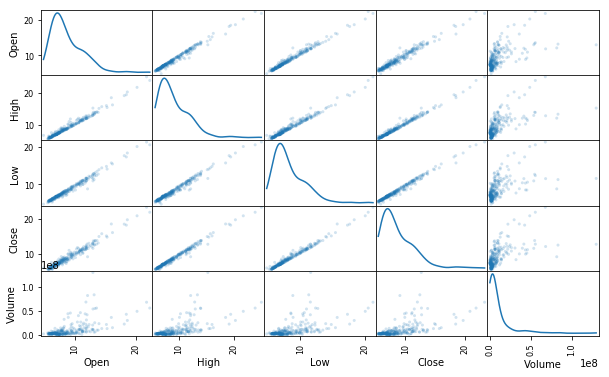

In [164]:
scatter_matrix(the_stock_data,alpha=0.2, figsize=(10, 6), diagonal='kde')
plt.show()

In [167]:
fig, ax = plt.subplots(1, 1)
table(ax, np.round(the_stock_data.describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])

IndexError: list index out of range